core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']
c:\Users\domen\OneDrive\Desktop\Develhope\Projects\Github\F1 Team Project\fasftF1\.venv\Lib\site-packages\fastf1\core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings

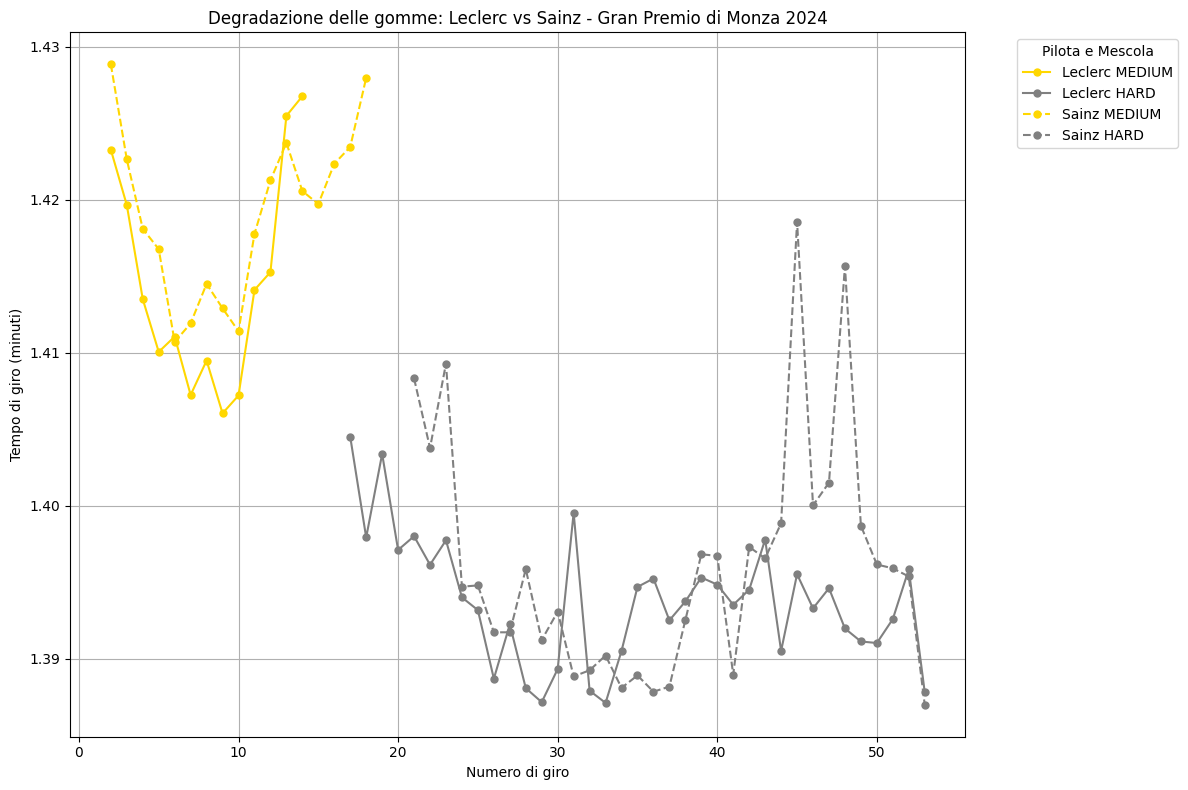

In [5]:
import fastf1 as ff1
import matplotlib.pyplot as plt
import pandas as pd


# Carica i dati del Gran Premio di Monza 2024
session = ff1.get_session(2024, 'Monza', 'R')
session.load()

# Ottieni i tempi di giro di Leclerc e Sainz
leclerc_laps = session.laps.pick_driver('LEC')
sainz_laps = session.laps.pick_driver('SAI')

# Filtra i dati per includere solo i giri di gara (escludendo pit stop, giri di formazione, etc.)
leclerc_laps = leclerc_laps[leclerc_laps['IsAccurate'] & (leclerc_laps['Stint'].notna())]
sainz_laps = sainz_laps[sainz_laps['IsAccurate'] & (sainz_laps['Stint'].notna())]

# Crea una mappatura dei colori per le mescole di pneumatici
compound_colors = {
    'SOFT': 'red',
    'MEDIUM': 'gold',
    'HARD': 'grey',
    'INTERMEDIATE': 'green',
    'WET': 'blue'
}

# Funzione per tracciare i tempi di giro con colori in base alla mescola
def plot_tyre_degradation(laps, driver_name, color_map, line_style):
    for stint in laps['Stint'].unique():
        stint_laps = laps[laps['Stint'] == stint]
        compound = stint_laps['Compound'].iloc[0]  # Mescola usata nello stint
        plt.plot(stint_laps['LapNumber'], stint_laps['LapTime'].dt.total_seconds() / 60,  # Converti in minuti
                 label=f'{driver_name} {compound}',
                 color=color_map.get(compound, 'black'),  # Usa il colore corrispondente
                 marker='o', markersize=5, linestyle=line_style)

# Crea il grafico
plt.figure(figsize=(12, 8))

# Traccia i dati di Leclerc (linea continua)
plot_tyre_degradation(leclerc_laps, 'Leclerc', compound_colors, line_style='-')

# Traccia i dati di Sainz (linea tratteggiata)
plot_tyre_degradation(sainz_laps, 'Sainz', compound_colors, line_style='--')

# Aggiungi titolo e etichette
plt.title('Degradazione delle gomme: Leclerc vs Sainz - Gran Premio di Monza 2024')
plt.xlabel('Numero di giro')
plt.ylabel('Tempo di giro (minuti)')
plt.legend(title='Pilota e Mescola', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostra il grafico
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
session.laps.pick_driver('LEC')

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:57:18.965000,LEC,16,0 days 00:01:28.179000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.989000,...,True,Ferrari,0 days 00:55:50.494000,2024-09-01 13:03:34.413,1,2.0,False,,False,False
1,0 days 00:58:44.361000,LEC,16,0 days 00:01:25.396000,2.0,1.0,NaT,NaT,0 days 00:00:27.707000,0 days 00:00:29.265000,...,True,Ferrari,0 days 00:57:18.965000,2024-09-01 13:05:02.884,1,2.0,False,,False,True
2,0 days 01:00:09.540000,LEC,16,0 days 00:01:25.179000,3.0,1.0,NaT,NaT,0 days 00:00:27.679000,0 days 00:00:29.001000,...,True,Ferrari,0 days 00:58:44.361000,2024-09-01 13:06:28.280,1,2.0,False,,False,True
3,0 days 01:01:34.350000,LEC,16,0 days 00:01:24.810000,4.0,1.0,NaT,NaT,0 days 00:00:27.653000,0 days 00:00:28.883000,...,True,Ferrari,0 days 01:00:09.540000,2024-09-01 13:07:53.459,1,2.0,False,,False,True
4,0 days 01:02:58.953000,LEC,16,0 days 00:01:24.603000,5.0,1.0,NaT,NaT,0 days 00:00:27.630000,0 days 00:00:28.790000,...,True,Ferrari,0 days 01:01:34.350000,2024-09-01 13:09:18.269,1,2.0,False,,False,True
5,0 days 01:04:23.616000,LEC,16,0 days 00:01:24.663000,6.0,1.0,NaT,NaT,0 days 00:00:27.596000,0 days 00:00:28.945000,...,True,Ferrari,0 days 01:02:58.953000,2024-09-01 13:10:42.872,1,2.0,False,,False,True
6,0 days 01:05:48.050000,LEC,16,0 days 00:01:24.434000,7.0,1.0,NaT,NaT,0 days 00:00:27.645000,0 days 00:00:28.701000,...,True,Ferrari,0 days 01:04:23.616000,2024-09-01 13:12:07.535,1,2.0,False,,False,True
7,0 days 01:07:12.619000,LEC,16,0 days 00:01:24.569000,8.0,1.0,NaT,NaT,0 days 00:00:27.557000,0 days 00:00:28.771000,...,True,Ferrari,0 days 01:05:48.050000,2024-09-01 13:13:31.969,1,2.0,False,,False,True
8,0 days 01:08:36.981000,LEC,16,0 days 00:01:24.362000,9.0,1.0,NaT,NaT,0 days 00:00:27.542000,0 days 00:00:28.781000,...,True,Ferrari,0 days 01:07:12.619000,2024-09-01 13:14:56.538,1,2.0,False,,False,True
9,0 days 01:10:01.413000,LEC,16,0 days 00:01:24.432000,10.0,1.0,NaT,NaT,0 days 00:00:27.515000,0 days 00:00:28.840000,...,True,Ferrari,0 days 01:08:36.981000,2024-09-01 13:16:20.900,1,2.0,False,,False,True


In [8]:
laps = leclerc_laps  # or sainz_laps, depending on which data you want to use
stint = 1  # Define the stint number you want to filter by
stint_laps = laps[laps['Stint'] == stint]
stint_laps['LapTime']


1    0 days 00:01:25.396000
2    0 days 00:01:25.179000
3    0 days 00:01:24.810000
4    0 days 00:01:24.603000
5    0 days 00:01:24.663000
6    0 days 00:01:24.434000
7    0 days 00:01:24.569000
8    0 days 00:01:24.362000
9    0 days 00:01:24.432000
10   0 days 00:01:24.846000
11   0 days 00:01:24.916000
12   0 days 00:01:25.529000
13   0 days 00:01:25.606000
Name: LapTime, dtype: timedelta64[ns]